# Linear Regression

Just as naive Bayes is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable.
The simplest form of a linear regression model (i.e., fitting a straight line to data) can be extended to model more complicated data behavior.
[after PythonDataScienceHandbook]()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

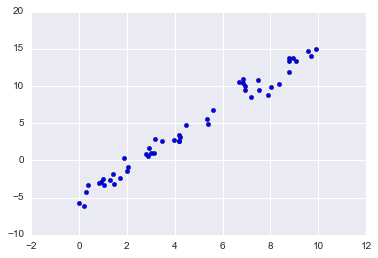

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

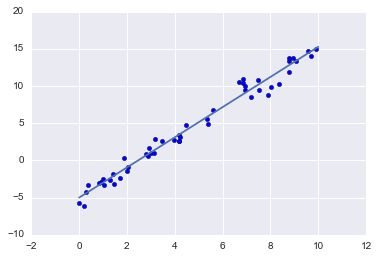

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.02720881036
Model intercept: -4.99857708555


The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

### 3D
$$
z = a_0 + a_1 x_1 + a_2 x_2
$$

or another words $Ax+By+Cz+D=0$


In [5]:
rng = np.random.RandomState(1)
X = 5 * rng.rand(100, 2) # x1,x2
z = 0.5 + np.dot(X, [1.0, 1.5])  #1.0, 1.5, -1 - normal vector in 3D space (x1,x2,z)

model.fit(X, z)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.   1.5]


<b> Let's visualize it <b>

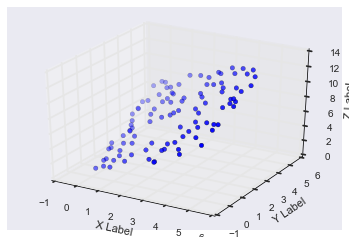

In [6]:
# %matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


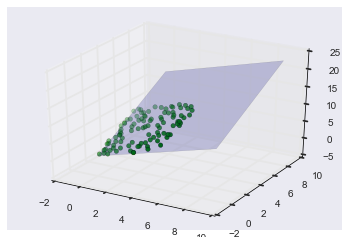

In [7]:
#  %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
plt3d = plt.figure().gca(projection='3d')
xx, yy = np.meshgrid(range(10), range(10))  # (10X10) grid

# for direct use of model.predict [need reshaping]
vectorize_x = xx.reshape(100,-1)
vectorize_y = yy.reshape(100,-1)
Xfit = np.hstack((vectorize_x,vectorize_y)) # the pair x,y as for trained X

Zfit = model.predict(Xfit)
zz = Zfit.reshape(10,10)

# plt3d.plot_surface(xx, yy, zz, alpha=0.2)

# or direct use of model coefficients
plt3d.plot_surface(xx, yy, model.intercept_ + model.coef_[0]*xx + model.coef_[1]*yy, alpha=0.2) 
plt3d.scatter(X[:,0], X[:,1], z, c='g', marker='o')

### 4D and more

In [8]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) #x1,x2,x3
y = 0.5 + np.dot(X, [1.5, -2., 1.])  #1.5, -2., 1., -1 - normal vector in 4D space (x1,x2,x3,y)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [10]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7,include_bias=False),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

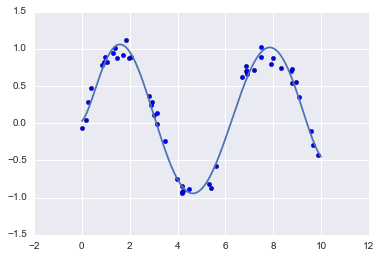

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [12]:
poly_model.steps[1][1].coef_, poly_model.steps[1][1].intercept_
# [1][1].coef_

(array([  3.31250194e-01,   1.28845778e+00,  -1.06474496e+00,
          2.90659230e-01,  -3.57011703e-02,   2.01614685e-03,
         -4.20513337e-05]), 0.028472625440697841)

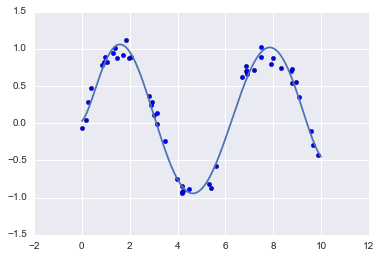

In [13]:
plt.scatter(x, y)
# put explicitly a0, a1, a2... a7
plt.plot(xfit, poly_model.steps[1][1].intercept_+poly_model.steps[1][1].coef_[0]*xfit+poly_model.steps[1][1].coef_[1]*xfit**2+poly_model.steps[1][1].coef_[2]*xfit**3+poly_model.steps[1][1].coef_[3]*xfit**4+poly_model.steps[1][1].coef_[4]*xfit**5+poly_model.steps[1][1].coef_[5]*xfit**6+poly_model.steps[1][1].coef_[6]*xfit**7)

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### Polynomial basis functions (let's make the same by hand through arbitrary basis function)

In [14]:
#source https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/preprocessing/data.py#L1326
#
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import chain, combinations
from itertools import combinations_with_replacement as combinations_w_r

class myPolyFeatures(BaseEstimator, TransformerMixin):
    """polynomial features for one-dimensional input"""

    def __init__(self, degree=2, interaction_only=False, include_bias=True,
                 order='C'):
        self.degree = degree
        self.interaction_only = interaction_only
        self.include_bias = include_bias
        self.order = order
    
    @staticmethod
    def _combinations(n_features, degree, interaction_only, include_bias):
        comb = (combinations if interaction_only else combinations_w_r)
        start = int(not include_bias)
        return chain.from_iterable(comb(range(n_features), i)
                                   for i in range(start, degree + 1))
    @property
    def powers_(self):
#         check_is_fitted(self, 'n_input_features_')

        combinations = self._combinations(self.n_input_features_, self.degree,
                                          self.interaction_only,
                                          self.include_bias)
        return np.vstack([np.bincount(c, minlength=self.n_input_features_)
                          for c in combinations]) 
    
    def get_feature_names(self, input_features=None):
        powers = self.powers_
        if input_features is None:
            input_features = ['x%d' % i for i in range(powers.shape[1])]
        feature_names = []
        for row in powers:
            inds = np.where(row)[0]
            if len(inds):
                name = " ".join("%s^%d" % (input_features[ind], exp)
                                if exp != 1 else input_features[ind]
                                for ind, exp in zip(inds, row[inds]))
            else:
                name = "1"
            feature_names.append(name)
        return feature_names
    def fit(self, X, y=None):
#         n_samples, n_features = check_array(X, accept_sparse=True).shape
        n_samples, n_features = X.shape
        combinations = self._combinations(n_features, self.degree,
                                          self.interaction_only,
                                          self.include_bias)
        self.n_input_features_ = n_features
        self.n_output_features_ = sum(1 for _ in combinations)
        return self
    def transform(self, X):
#         check_is_fitted(self, ['n_input_features_', 'n_output_features_'])

#         X = check_array(X, order='F', dtype=FLOAT_DTYPES, accept_sparse=('csr', 'csc'))

        n_samples, n_features = X.shape

        if n_features != self.n_input_features_:
            raise ValueError("X shape does not match training shape")
      
        if True:

#         if sparse.isspmatrix_csr(X):
#             if self.degree > 3:
#                 return self.transform(X.tocsc()).tocsr()
#             to_stack = []
#             if self.include_bias:
#                 to_stack.append(np.ones(shape=(n_samples, 1), dtype=X.dtype))
#             to_stack.append(X)
#             for deg in range(2, self.degree+1):
#                 Xp_next = _csr_polynomial_expansion(X.data, X.indices,
#                                                     X.indptr, X.shape[1],
#                                                     self.interaction_only,
#                                                     deg)
#                 if Xp_next is None:
#                     break
#                 to_stack.append(Xp_next)
#             XP = sparse.hstack(to_stack, format='csr')
#         elif sparse.isspmatrix_csc(X) and self.degree < 4:
#             return self.transform(X.tocsr()).tocsc()
#         else:

            combinations = self._combinations(n_features, self.degree,
                                              self.interaction_only,
                                              self.include_bias)
            if True:
#             if sparse.isspmatrix(X):
#                 columns = []
#                 for comb in combinations:
#                     if comb:
#                         out_col = 1
#                         for col_idx in comb:
#                             out_col = X[:, col_idx].multiply(out_col)
#                         columns.append(out_col)
#                     else:
#                         bias = sparse.csc_matrix(np.ones((X.shape[0], 1)))
#                         columns.append(bias)
#                 XP = sparse.hstack(columns, dtype=X.dtype).tocsc()
#             else:
                XP = np.empty((n_samples, self.n_output_features_),
                              dtype=X.dtype, order=self.order)
                for i, comb in enumerate(combinations):
                    XP[:, i] = X[:, comb].prod(1)

        return XP
                          
      



In [15]:
my_poly_model = make_pipeline(myPolyFeatures(7,include_bias=False),
                           LinearRegression())

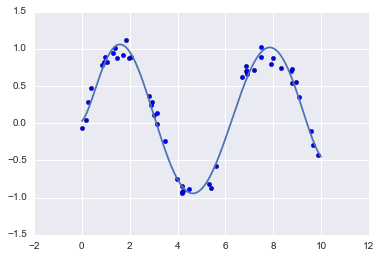

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)
my_poly_model.fit(x[:, np.newaxis], y)
yfit = my_poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [17]:
# The way by cutting source is not simple and explicit, because it covers bigger cases via itertools. Let's make it simple

class mySimplePolyFeatures(BaseEstimator, TransformerMixin):
    """polynomial features for one-dimensional input"""
    
    def __init__(self, degree = 2):
        self.degree = degree
        
    
    @staticmethod
    def _poly_basis(x, degree):
        b = np.zeros((x.shape[0], degree))
        for i in np.arange(degree):
            b[:,i] = np.power(x,i+1)[:,0]
#             np.c_[ x, np.power(x,i)] 
            
        return b
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return self._poly_basis(X,self.degree)


In [18]:
#test
dummy = np.array([2, 3, 4])
poly = mySimplePolyFeatures(4)
poly.fit_transform(dummy[:, None])

array([[   2.,    4.,    8.,   16.],
       [   3.,    9.,   27.,   81.],
       [   4.,   16.,   64.,  256.]])

In [19]:
my_poly_model = make_pipeline(mySimplePolyFeatures(7),
                           LinearRegression())

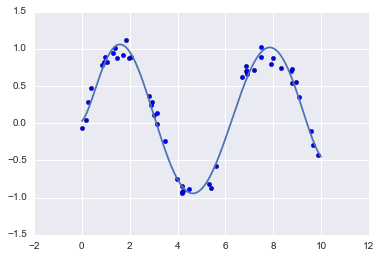

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)
my_poly_model.fit(x[:, np.newaxis], y)
yfit = my_poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

![](gaussian-basis.png)
[figure Good start for Raman spectra fitting](#Gaussian-Basis)

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):


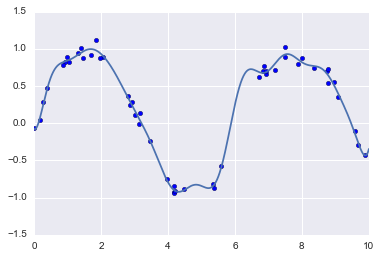

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

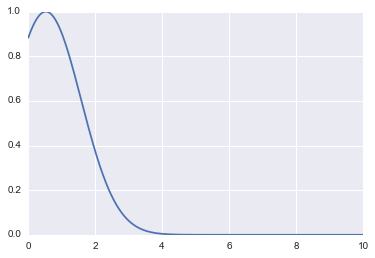

In [41]:
y_look = GaussianFeatures(20).fit_transform(xfit[:, np.newaxis], y)
y_look[:,1].shape
plt.plot(xfit, y_look[:,1])

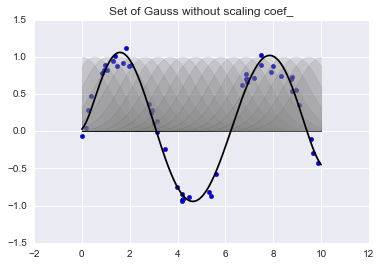

In [49]:
fig, ax = plt.subplots()
ax.plot(xfit, yfit, color='black')
ax.scatter(x, y)
for i in range(20):
    ax.fill_between(xfit, 0, y_look[:,i], facecolor='gray', alpha=0.2)
    ax.set_title("Set of Gauss without scaling coef_")

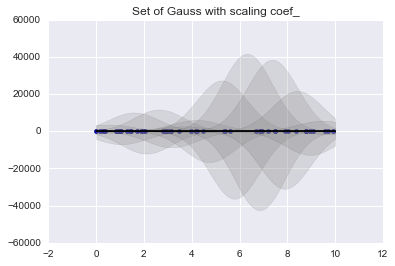

In [76]:
y_look_corr = y_look*(gauss_model.steps[1][1].coef_)
fig, ax = plt.subplots()
ax.plot(xfit, yfit, color='black')
ax.scatter(x, y)
    
for i in range(20):
    ax.fill_between(xfit, 0, y_look_corr[:,i]+gauss_model.steps[1][1].intercept_/20, facecolor='gray', alpha=0.2)
    ax.set_title("Set of Gauss with scaling coef_")

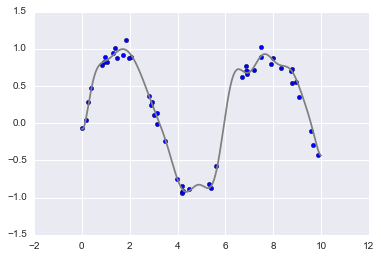

In [67]:
fig, ax = plt.subplots()
ax.plot(xfit, np.sum(y_look_corr, axis = 1)+gauss_model.steps[1][1].intercept_, color='gray')
ax.scatter(x, y)

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

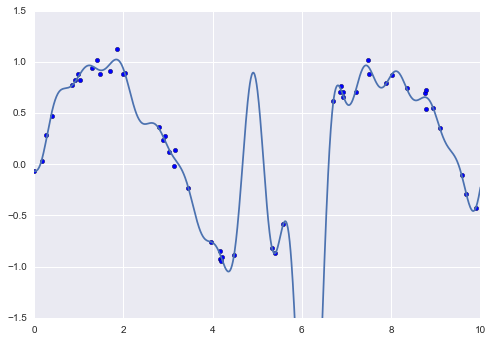

In [10]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

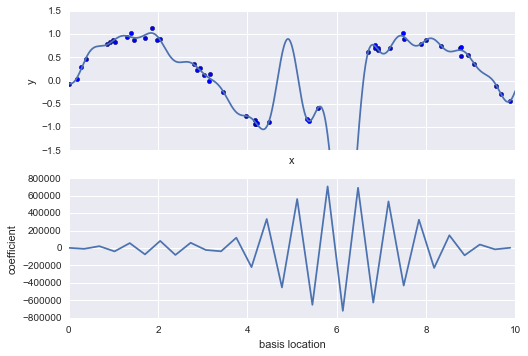

In [11]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

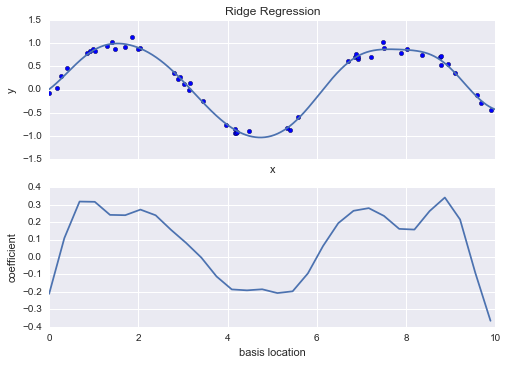

In [12]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

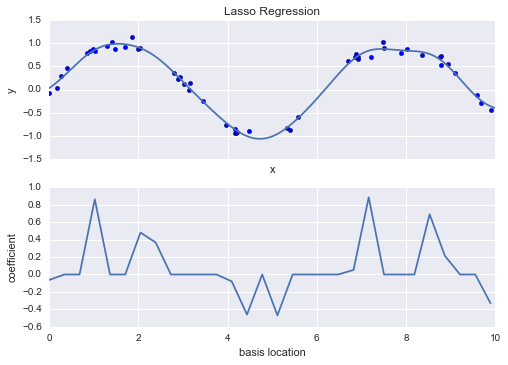

In [13]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation.